In [89]:
# Google Drive와 연동하여 코드 및 Model 관리를 편리하게 하고자 합니다.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
# Python 라이브러리를 이용하기 위해 라이브러리 정의
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Dataset Load
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

# Target 변수인 CMEDV를 기준으로 Data 분석을 하기 위해 CMEDV column의 순서를 바꿉니다.
df = df[["TOWN", "CMEDV", "LON", "LAT", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]

In [91]:
# Dataframe 확인
df

,TOWN,CMEDV,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,24.0,-70.9550,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,21.6,-70.9500,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,34.7,-70.9360,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,33.4,-70.9280,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,36.2,-70.9220,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,22.4,-70.9860,42.2312,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,20.6,-70.9910,42.2275,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,23.9,-70.9948,42.2260,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,22.0,-70.9875,42.2240,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [92]:
# Dataset의 Town의 종류가 몇 종류인지 value_count 함수를 이용하여 확인합니다.
df['TOWN'].value_counts(ascending = True)

Middleton             1
Cohasset              1
Wenham                1
Hamilton              1
Manchester            1
                     ..
Newton               18
Boston Roxbury       19
Lynn                 22
Boston Savin Hill    23
Cambridge            30
Name: TOWN, Length: 92, dtype: int64

In [93]:
# 상관 관계 Heatmap을 구하기 위하여 Dataframe 변수의 Correlation 값을 구합니다.
df.corr()

,CMEDV,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.322947,0.006826,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
LON,-0.322947,1.000000,0.143054,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602,-0.018300,0.195630
LAT,0.006826,0.143054,1.000000,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527,0.105254,0.045660
CRIM,-0.389582,0.065101,-0.084293,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.218081,-0.129667,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.062702,-0.041093,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.175619,-0.044726,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.160871,-0.068600,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.257110,-0.069317,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.204739,0.079035,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339


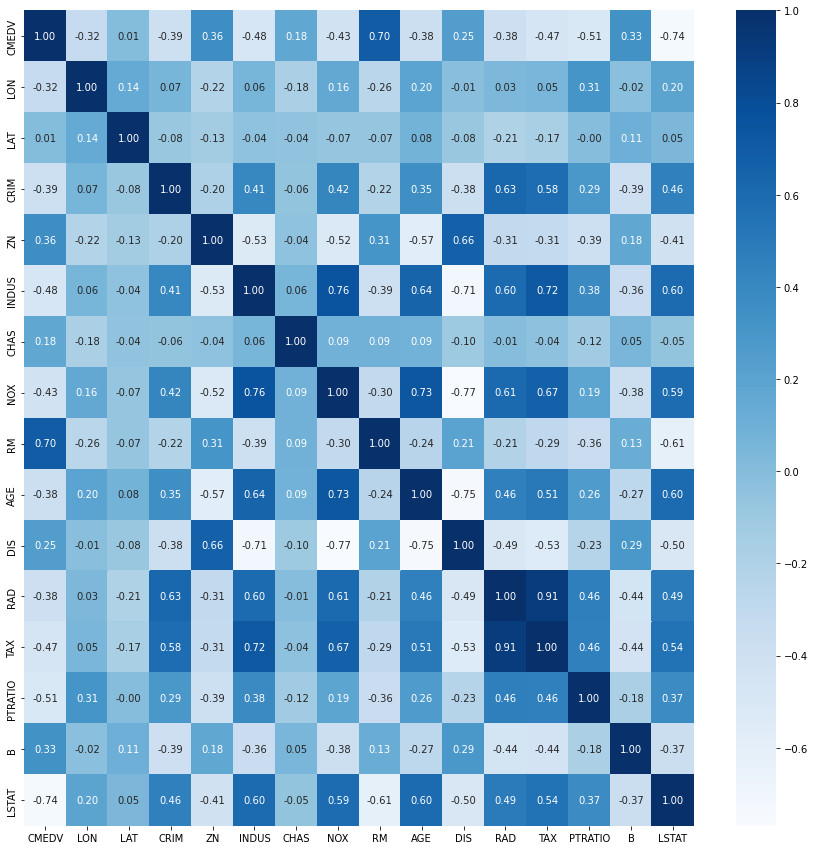

In [94]:
# seaborn heatmap 라이브러리를 이용하여 상관 관계 heatmap을 구현합니다.
plt.figure(figsize = (15, 15))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

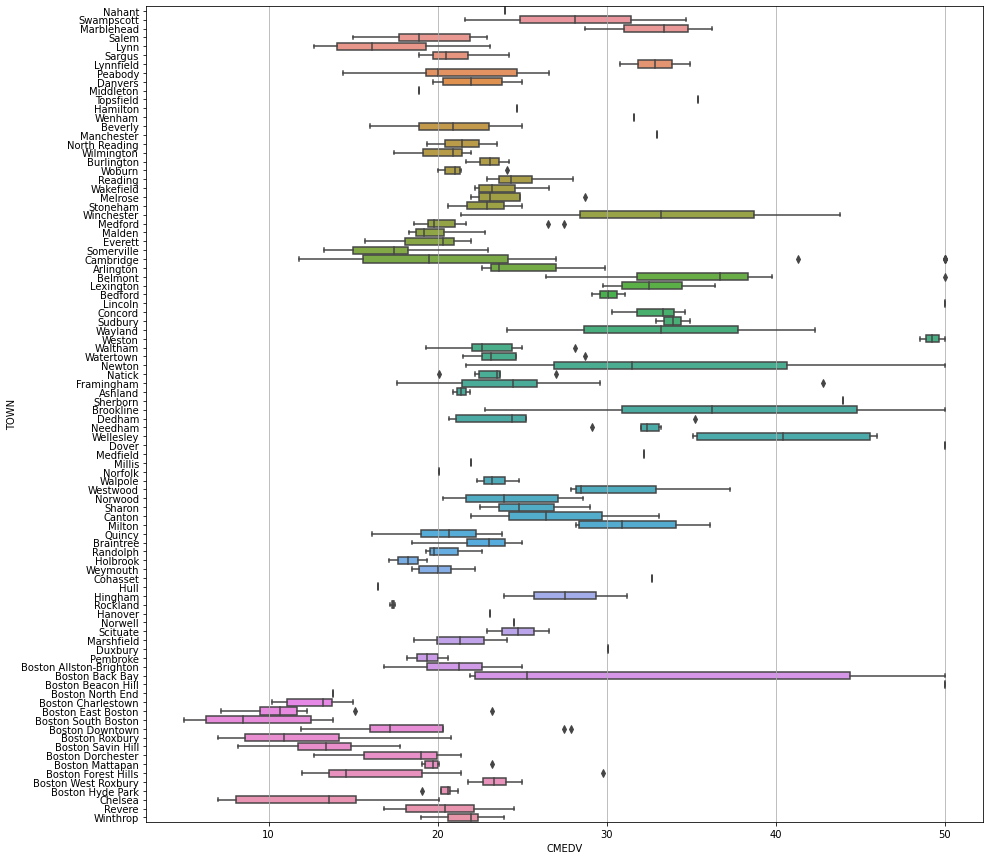

In [95]:
# Town 별 CMEDV 값 분포 확인을 위해 seaborn 라이브러리를 이용하여 boxplot을 구합니다.
plt.figure(figsize = (15, 15))
plt.grid()
sns.boxplot(data = df, x = 'CMEDV', y = 'TOWN')
plt.show()

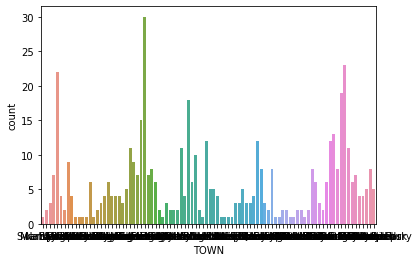

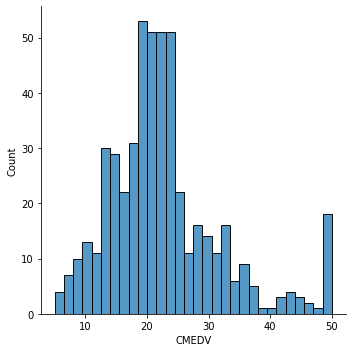

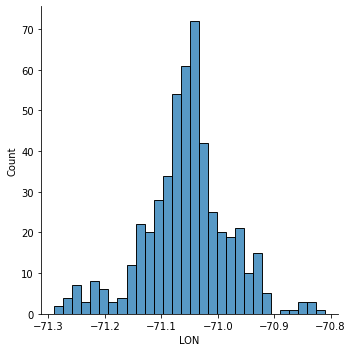

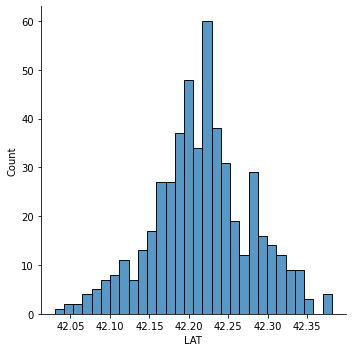

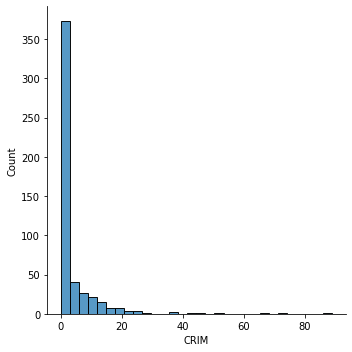

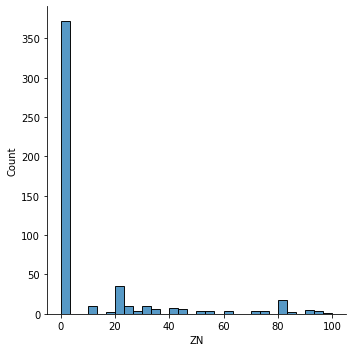

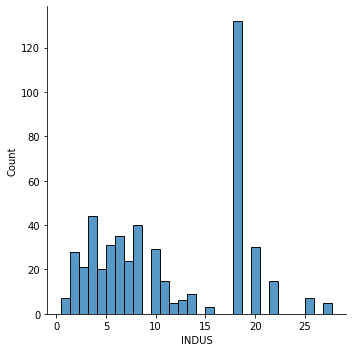

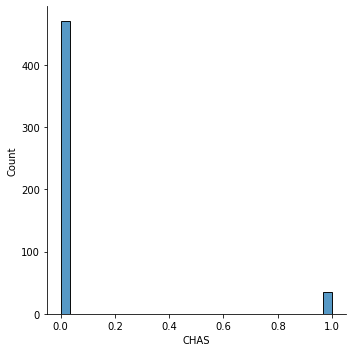

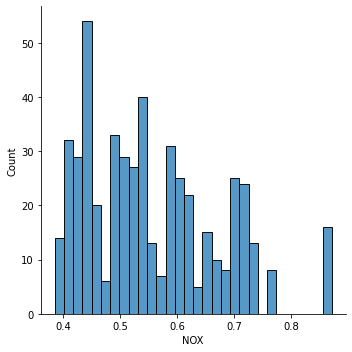

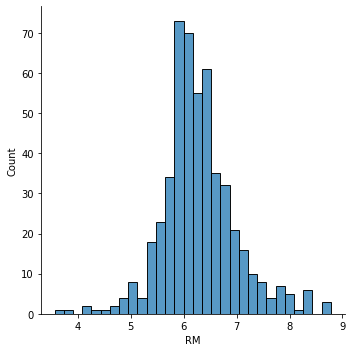

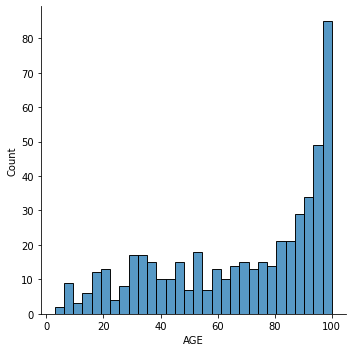

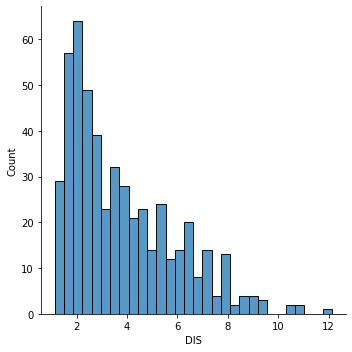

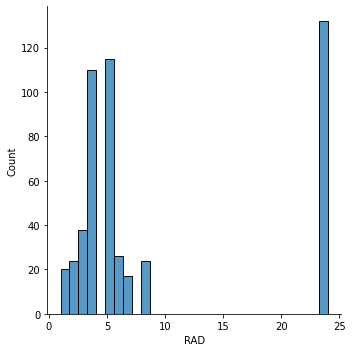

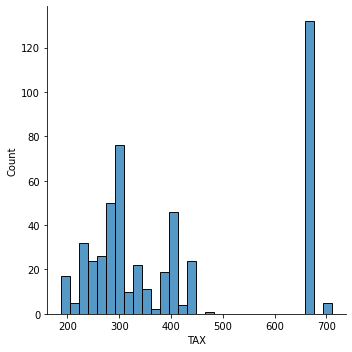

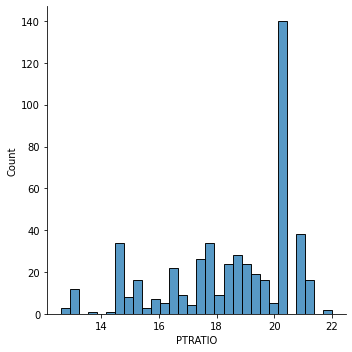

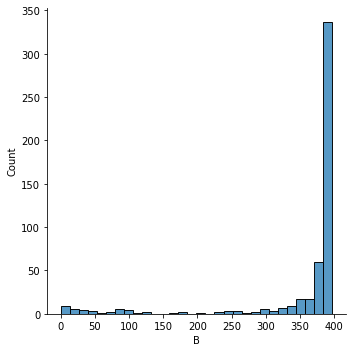

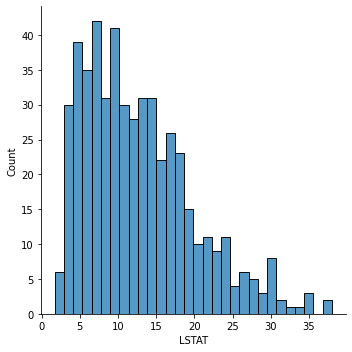

In [96]:
# Dataframe 내의 모든 변수의 분포를 확인하기 위해 seaborn displot 라이브러리를 이용하여 범위 별 변수의 개수를 count하는 그래프를 구현합니다.
sns.countplot(data = df, x = 'TOWN')
plt.show()
sns.displot(df['CMEDV'], bins = 30)
plt.show()
sns.displot(df['LON'], bins = 30)
plt.show()
sns.displot(df['LAT'], bins = 30)
plt.show()
sns.displot(df['CRIM'], bins = 30)
plt.show()
sns.displot(df['ZN'], bins = 30)
plt.show()
sns.displot(df['INDUS'], bins = 30)
plt.show()
sns.displot(df['CHAS'], bins = 30)
plt.show()
sns.displot(df['NOX'], bins = 30)
plt.show()
sns.displot(df['RM'], bins = 30)
plt.show()
sns.displot(df['AGE'], bins = 30)
plt.show()
sns.displot(df['DIS'], bins = 30)
plt.show()
sns.displot(df['RAD'], bins = 30)
plt.show()
sns.displot(df['TAX'], bins = 30)
plt.show()
sns.displot(df['PTRATIO'], bins = 30)
plt.show()
sns.displot(df['B'], bins = 30)
plt.show()
sns.displot(df['LSTAT'], bins = 30)
plt.show()

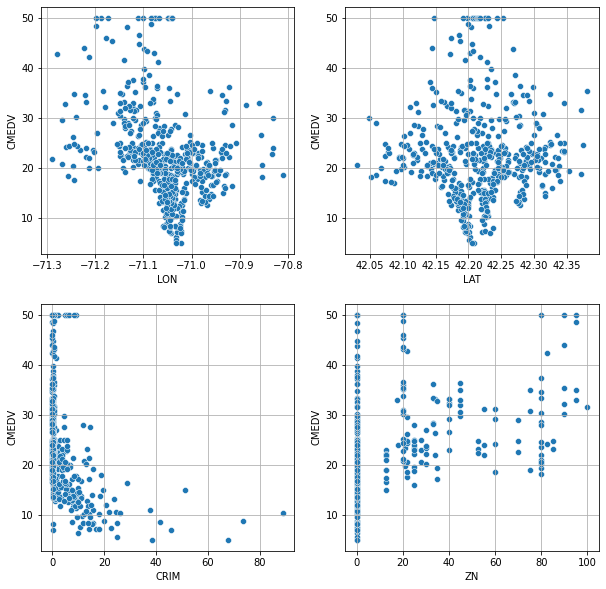

In [97]:
# CMEDV와 각 변수 간의 관계를 나타내는 plot을 seaborn scatterplot 라이브러리를 이용하여 출력합니다.
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.grid()
sns.scatterplot(data = df, x = 'LON', y = 'CMEDV')
plt.subplot(2, 2, 2)
plt.grid()
sns.scatterplot(data = df, x = 'LAT', y = 'CMEDV')
plt.subplot(2, 2, 3)
plt.grid()
sns.scatterplot(data = df, x = 'CRIM', y = 'CMEDV')
plt.subplot(2, 2, 4)
plt.grid()
sns.scatterplot(data = df, x = 'ZN', y = 'CMEDV')

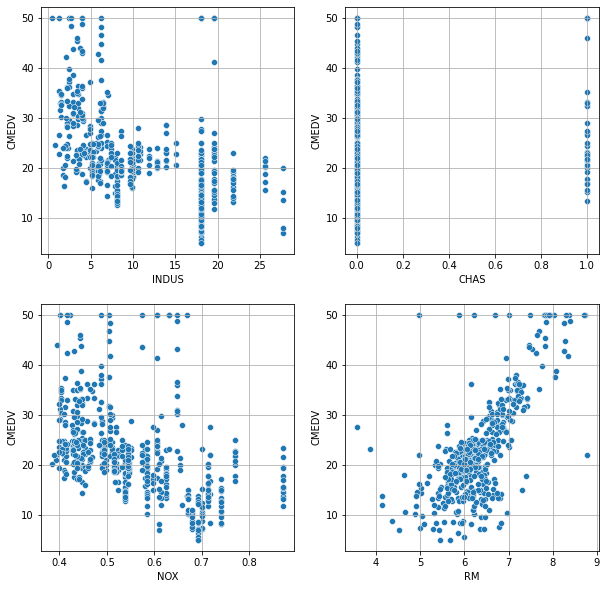

In [98]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.grid()
sns.scatterplot(data = df, x = 'INDUS', y = 'CMEDV')
plt.subplot(2, 2, 2)
plt.grid()
sns.scatterplot(data = df, x = 'CHAS', y = 'CMEDV')
plt.subplot(2, 2, 3)
plt.grid()
sns.scatterplot(data = df, x = 'NOX', y = 'CMEDV')
plt.subplot(2, 2, 4)
plt.grid()
sns.scatterplot(data = df, x = 'RM', y = 'CMEDV')

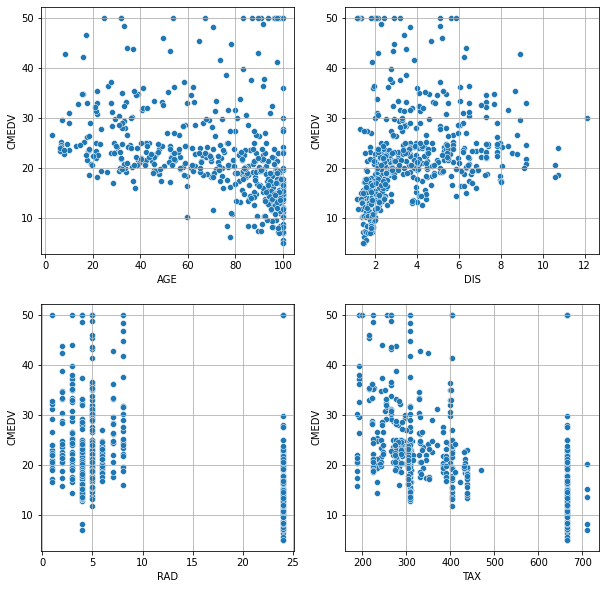

In [99]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.grid()
sns.scatterplot(data = df, x = 'AGE', y = 'CMEDV')
plt.subplot(2, 2, 2)
plt.grid()
sns.scatterplot(data = df, x = 'DIS', y = 'CMEDV')
plt.subplot(2, 2, 3)
plt.grid()
sns.scatterplot(data = df, x = 'RAD', y = 'CMEDV')
plt.subplot(2, 2, 4)
plt.grid()
sns.scatterplot(data = df, x = 'TAX', y = 'CMEDV')

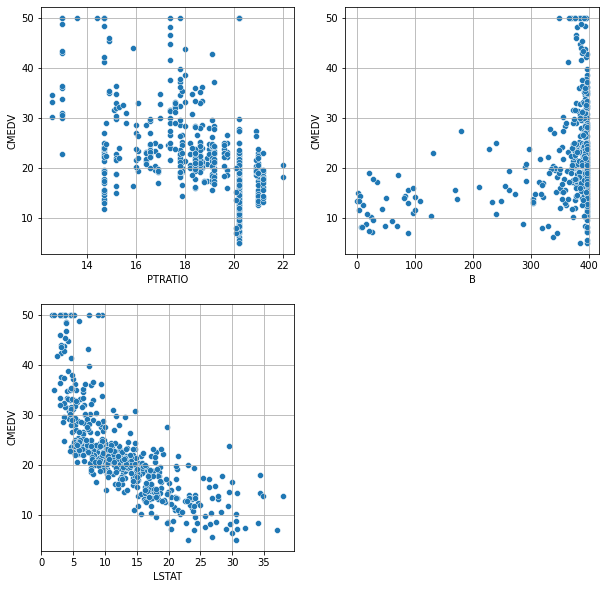

In [100]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.grid()
sns.scatterplot(data = df, x = 'PTRATIO', y = 'CMEDV')
plt.subplot(2, 2, 2)
plt.grid()
sns.scatterplot(data = df, x = 'B', y = 'CMEDV')
plt.subplot(2, 2, 3)
plt.grid()
sns.scatterplot(data = df, x = 'LSTAT', y = 'CMEDV')

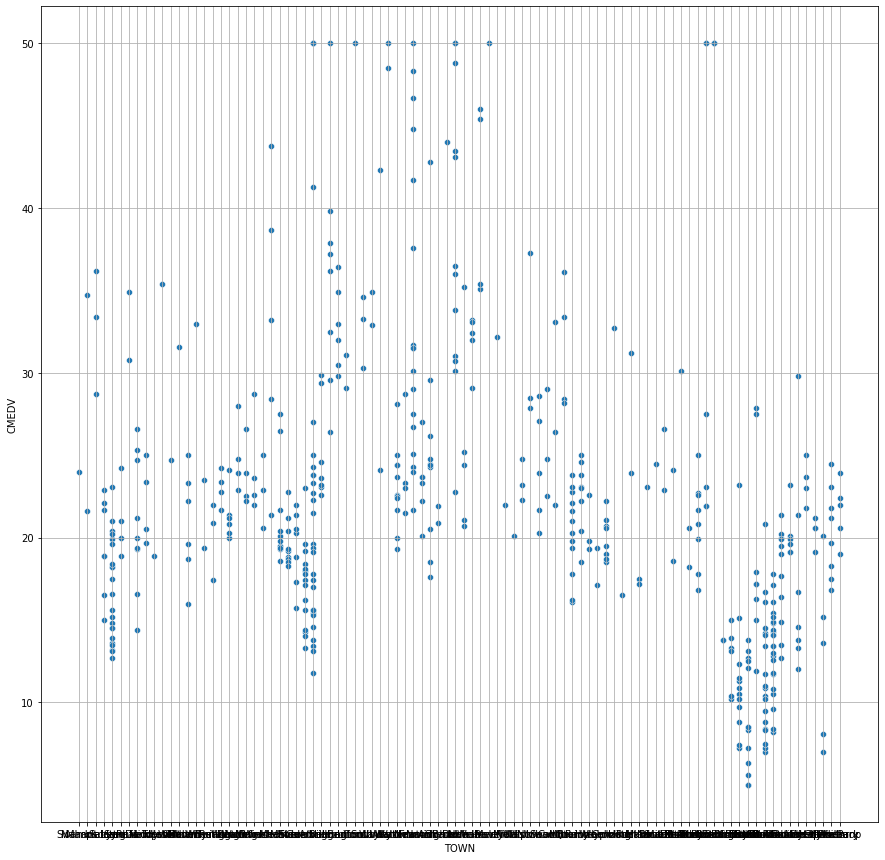

In [101]:
plt.figure(figsize = (15, 15))
plt.grid()
sns.scatterplot(data = df, x = 'TOWN', y = 'CMEDV')
plt.show()

In [102]:
# Dataframe 내 변수의 scale이 다양하기에 학습 최적화를 위하여 Normalization을 통해 변수의 scale을 맞춰줍니다.
standardzation = ['LON', 'LAT', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[standardzation] = ss.zscore(df[standardzation])
dataset = df[standardzation]
# CHAS의 경우, 0 / 1로 표현되는 Dummy variable이기에 Normalization을 진행하지 않고, 기존 Dataframe 값을 그대로 이용합니다.
dataset['CHAS'] = df['CHAS']
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LON,LAT,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,1.345913,0.624791,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0
1,1.412287,1.151396,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0
2,1.598134,1.078482,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0
3,1.704333,1.240514,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0
4,1.783981,1.321530,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.934395,0.239154,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,0
502,0.868021,0.179203,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,0
503,0.817577,0.154898,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0
504,0.914483,0.122491,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,0


In [103]:
# Dataset 내에서 Training Dataset / Test Dataset을 8:2 비율로 Random하게 분리합니다.
X = dataset
Y = df['CMEDV']
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1)

In [104]:
# Training Dataset의 Data 개수와 변수 개수를 확인합니다.
X_train_data.shape

(404, 15)

In [105]:
# Regression Model Training 결과 값을 저장하기 위해 Dataframe에서 한 개의 열을 추가로 생성합니다.
X_train = np.hstack((np.ones((404, 1)), X_train_data))

In [106]:
# Gradient Descent Regression Model 구현을 위해 Cost Function을 계산합니다.
def cost_function(X_train, Y_train, b):
  # b = regression coefficient
  # m = Number of Training Datas
  m = 404 
  predictions = X_train.dot(b)
  errors = np.subtract(predictions, Y_train)
  J = 1 / (2 * m) * errors.T.dot(errors)
  return J

In [107]:
# Regression Model 구현을 위해 Gradient Descent Algorithm function을 구현합니다.
def gradient_descent(X_train, Y_train, b, lr, iterations):
  # lr = learning rate
  m = 404
  cost = np.zeros(iterations)
  for i in range(iterations):
    predictions = X_train.dot(b)
    errors = np.subtract(predictions, Y_train)
    sum_delta = (lr / m) * X_train.transpose().dot(errors)
    b = b - sum_delta
    cost[i] = cost_function(X_train, Y_train, b)

  return b, cost

In [108]:
# Regression Model에서 regression coefficient 값을 대입하기 위해 numpy 라이브러리를 이용하여 Training Dataset의 변수 개수 + 1개만큼 초기 값을 지정해줍니다.
b = np.zeros(16)
# iteration, learning rate를 설정합니다.
iterations = 200
lr = 0.1

In [109]:
# Gradient Descent Model Training
b, cost = gradient_descent(X_train, Y_train_data, b, lr, iterations)

In [110]:
# Normal Equation Algorithm 구현
def normal_equation(X_train, Y_train):
  X_train_transpose = np.transpose(X_train)
  temp_1 = np.linalg.inv(X_train_transpose.dot(X_train))
  temp_2 = X_train_transpose.dot(Y_train)
  theta = temp_1.dot(temp_2)

  return theta

In [111]:
# Normal Equation Model Training
theta = normal_equation(X_train, Y_train_data)

In [112]:
# Training Model을 이용하여 Test 진행
X_test = np.hstack((np.ones((102, 1)), X_test_data))
grad_price = X_test.dot(b)
norm_price = X_test.dot(theta)

In [118]:
# 넘파이 확장자로 학습에 사용된 Model Parameter를 저장
np.save('Gradient Descent regression coefficient', b)
np.save('Normal Equation regression coefficient', theta)

Text(0.5, 1.0, 'Loss Graph')

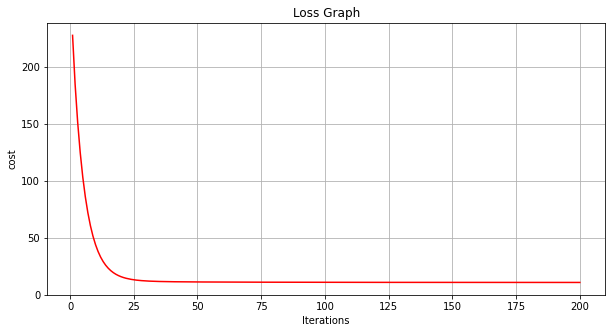

In [119]:
# Iterations에 따른 Loss(Cost)를 확인하기 위한 그래프를 설정합니다.
plt.figure(figsize = (10, 5))
plt.plot(range(1, iterations + 1), cost, color ='red')
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Loss Graph")

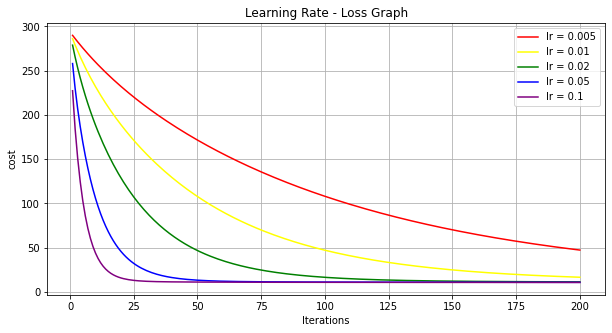

In [65]:
# Learning Rate에 따른 Loss를 확인하기 위한 그래프를 설정합니다.
iterations = 200
b = np.zeros(16)
lr = 0.005
b_1, cost_1 = gradient_descent(X_train, Y_train_data, b, lr, iterations)
lr = 0.01
b_2, cost_2 = gradient_descent(X_train, Y_train_data, b, lr, iterations)
lr = 0.02
b_3, cost_3 = gradient_descent(X_train, Y_train_data, b, lr, iterations)
lr = 0.05
b_4, cost_4 = gradient_descent(X_train, Y_train_data, b, lr, iterations)
lr = 0.1
b_5, cost_5 = gradient_descent(X_train, Y_train_data, b, lr, iterations)

plt.figure(figsize = (10, 5))
plt.plot(range(1, iterations + 1), cost_1, color ='red', label = 'lr = 0.005')
plt.plot(range(1, iterations + 1), cost_2, color ='yellow', label = 'lr = 0.01')
plt.plot(range(1, iterations + 1), cost_3, color ='green', label = 'lr = 0.02')
plt.plot(range(1, iterations + 1), cost_4, color ='blue', label = 'lr = 0.05')
plt.plot(range(1, iterations + 1), cost_5, color ='purple', label = 'lr = 0.1')
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Learning Rate - Loss Graph")
plt.legend()

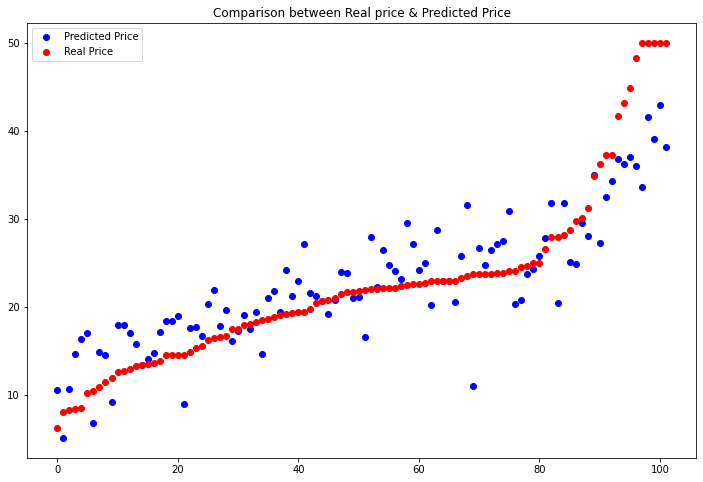

In [66]:
# Gradient Descent / Normal Equation Model Regression 결과 시각화를 위해 Test Data와 Model을 이용하여 예측한 Data와의 비교 Graph를 구현
df1 = pd.DataFrame({'Real Price' : Y_test_data, 'Predicted Price' : grad_price})
df2 = pd.DataFrame({'Real Price' : Y_test_data, 'Predicted Price' : norm_price})
df1 = df1.sort_values(by = 'Real Price').reset_index(drop = True)
df2 = df2.sort_values(by = 'Real Price').reset_index(drop = True)
# Gradient Descent
plt.figure(figsize = (12, 8))
plt.scatter(df1.index, df1['Predicted Price'], color='blue')
plt.scatter(df1.index, df1['Real Price'], color='red')
plt.title("Comparison between Real price & Predicted Price")
plt.legend(['Predicted Price', 'Real Price'])
plt.show()

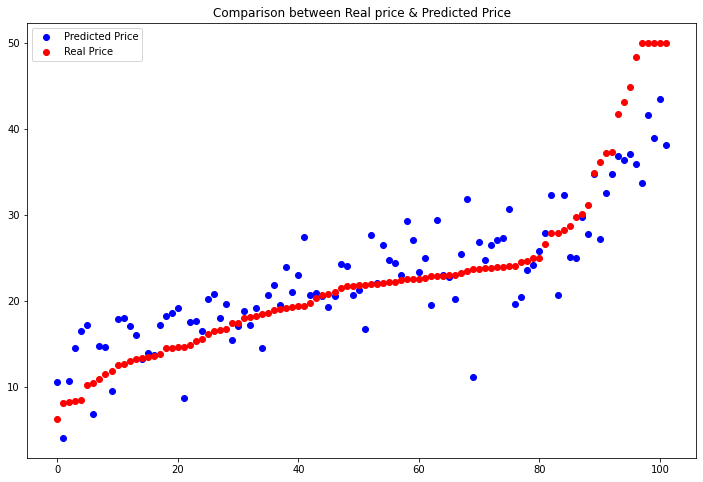

In [67]:
# Normal Equation
plt.figure(figsize = (12, 8))
plt.scatter(df2.index, df2['Predicted Price'], color='blue')
plt.scatter(df2.index, df2['Real Price'], color='red')
plt.title("Comparison between Real price & Predicted Price")
plt.legend(['Predicted Price', 'Real Price'])
plt.show()

In [85]:
# Mean Absolute Error / Root Mean Squared Error / R-Squared metric을 이용하여 성능 평가
# Gradient Descent
MEA = metrics.mean_absolute_error(Y_test_data, grad_price)
print('MEA for the model : {}'.format(MEA))
RMSE = np.sqrt(metrics.mean_squared_error(Y_test_data, grad_price))
print('RMSE for the model : {}'.format(RMSE))
R = metrics.explained_variance_score(Y_test_data, grad_price)
print('R squared of the model : {}'.format(R))

MEA for the model : 3.7179153415755177
RMSE for the model : 4.817028498748373
R squared of the model : 0.7656236752102229


In [86]:
# Normal Equation
MEA2 = metrics.mean_absolute_error(Y_test_data, norm_price)
print('MEA for the model : {}'.format(MEA2))
RMSE2 = np.sqrt(metrics.mean_squared_error(Y_test_data, norm_price))
print('RMSE for the model : {}'.format(RMSE2))
R2 = metrics.explained_variance_score(Y_test_data, norm_price)
print('R squared of the model : {}'.format(R2))

MEA for the model : 3.716796315644998
RMSE for the model : 4.824447376842844
R squared of the model : 0.7646795428800842


In [80]:
# 가설 증명을 위해 Test Dataset 변수와 Prediction Price를 하나의 Dataframe으로 결합
df3 = pd.DataFrame({'Predicted Price' : grad_price})
df4 = pd.DataFrame({'Predicted Price' : norm_price})
grad_predict_np = np.hstack([df3.values, X_test_data])
column_names = ["CMEDV", "LON", "LAT", "CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "CHAS"]
grad_predict = pd.DataFrame(grad_predict_np, columns = column_names)

In [78]:
norm_predict_np = np.hstack([df4.values, X_test_data])
column_names = ["CMEDV", "LON", "LAT", "CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "CHAS"]
norm_predict = pd.DataFrame(norm_predict_np, columns = column_names)

In [81]:
# 상관 관계 Heatmap을 구하기 위하여 Dataframe 변수의 Correlation 값을 구합니다.
grad_predict.corr()

,CMEDV,LON,LAT,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
CMEDV,1.000000,-0.284178,-0.018788,-0.461929,0.439976,-0.537000,-0.465421,0.802462,-0.334906,0.229612,-0.404460,-0.559015,-0.547300,0.345119,-0.858386,0.218978
LON,-0.284178,1.000000,0.061602,-0.020953,-0.205379,-0.096969,0.034727,-0.153021,0.059727,0.183419,-0.095366,-0.031573,0.268542,0.068774,0.007681,-0.065679
LAT,-0.018788,0.061602,1.000000,-0.047487,-0.119664,0.081794,0.058765,-0.093848,0.265763,-0.223421,-0.112338,-0.103245,0.003894,0.021655,0.141470,0.035338
CRIM,-0.461929,-0.020953,-0.047487,1.000000,-0.245764,0.505969,0.531627,-0.281147,0.389352,-0.464595,0.769492,0.697080,0.349864,-0.520264,0.499757,-0.013223
ZN,0.439976,-0.205379,-0.119664,-0.245764,1.000000,-0.505476,-0.524442,0.198199,-0.568046,0.567666,-0.296440,-0.317919,-0.378198,0.183908,-0.382285,-0.079561
INDUS,-0.537000,-0.096969,0.081794,0.505969,-0.505476,1.000000,0.770622,-0.380579,0.676341,-0.743716,0.598837,0.760904,0.355157,-0.330901,0.611649,0.146742
NOX,-0.465421,0.034727,0.058765,0.531627,-0.524442,0.770622,1.000000,-0.265713,0.743306,-0.780730,0.591642,0.644399,0.185489,-0.338053,0.558777,0.053115
RM,0.802462,-0.153021,-0.093848,-0.281147,0.198199,-0.380579,-0.265713,1.000000,-0.128370,0.104422,-0.222493,-0.366500,-0.276793,0.093480,-0.624640,0.133619
AGE,-0.334906,0.059727,0.265763,0.389352,-0.568046,0.676341,0.743306,-0.128370,1.000000,-0.720401,0.432773,0.480204,0.238066,-0.224262,0.471361,0.168099
DIS,0.229612,0.183419,-0.223421,-0.464595,0.567666,-0.743716,-0.780730,0.104422,-0.720401,1.000000,-0.513208,-0.536594,-0.256668,0.301216,-0.459551,-0.138940


In [82]:
norm_predict.corr()

,CMEDV,LON,LAT,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
CMEDV,1.000000,-0.293242,-0.011508,-0.447805,0.442104,-0.528644,-0.459364,0.796848,-0.328187,0.218597,-0.385224,-0.553933,-0.540314,0.340793,-0.850441,0.220774
LON,-0.293242,1.000000,0.061602,-0.020953,-0.205379,-0.096969,0.034727,-0.153021,0.059727,0.183419,-0.095366,-0.031573,0.268542,0.068774,0.007681,-0.065679
LAT,-0.011508,0.061602,1.000000,-0.047487,-0.119664,0.081794,0.058765,-0.093848,0.265763,-0.223421,-0.112338,-0.103245,0.003894,0.021655,0.141470,0.035338
CRIM,-0.447805,-0.020953,-0.047487,1.000000,-0.245764,0.505969,0.531627,-0.281147,0.389352,-0.464595,0.769492,0.697080,0.349864,-0.520264,0.499757,-0.013223
ZN,0.442104,-0.205379,-0.119664,-0.245764,1.000000,-0.505476,-0.524442,0.198199,-0.568046,0.567666,-0.296440,-0.317919,-0.378198,0.183908,-0.382285,-0.079561
INDUS,-0.528644,-0.096969,0.081794,0.505969,-0.505476,1.000000,0.770622,-0.380579,0.676341,-0.743716,0.598837,0.760904,0.355157,-0.330901,0.611649,0.146742
NOX,-0.459364,0.034727,0.058765,0.531627,-0.524442,0.770622,1.000000,-0.265713,0.743306,-0.780730,0.591642,0.644399,0.185489,-0.338053,0.558777,0.053115
RM,0.796848,-0.153021,-0.093848,-0.281147,0.198199,-0.380579,-0.265713,1.000000,-0.128370,0.104422,-0.222493,-0.366500,-0.276793,0.093480,-0.624640,0.133619
AGE,-0.328187,0.059727,0.265763,0.389352,-0.568046,0.676341,0.743306,-0.128370,1.000000,-0.720401,0.432773,0.480204,0.238066,-0.224262,0.471361,0.168099
DIS,0.218597,0.183419,-0.223421,-0.464595,0.567666,-0.743716,-0.780730,0.104422,-0.720401,1.000000,-0.513208,-0.536594,-0.256668,0.301216,-0.459551,-0.138940


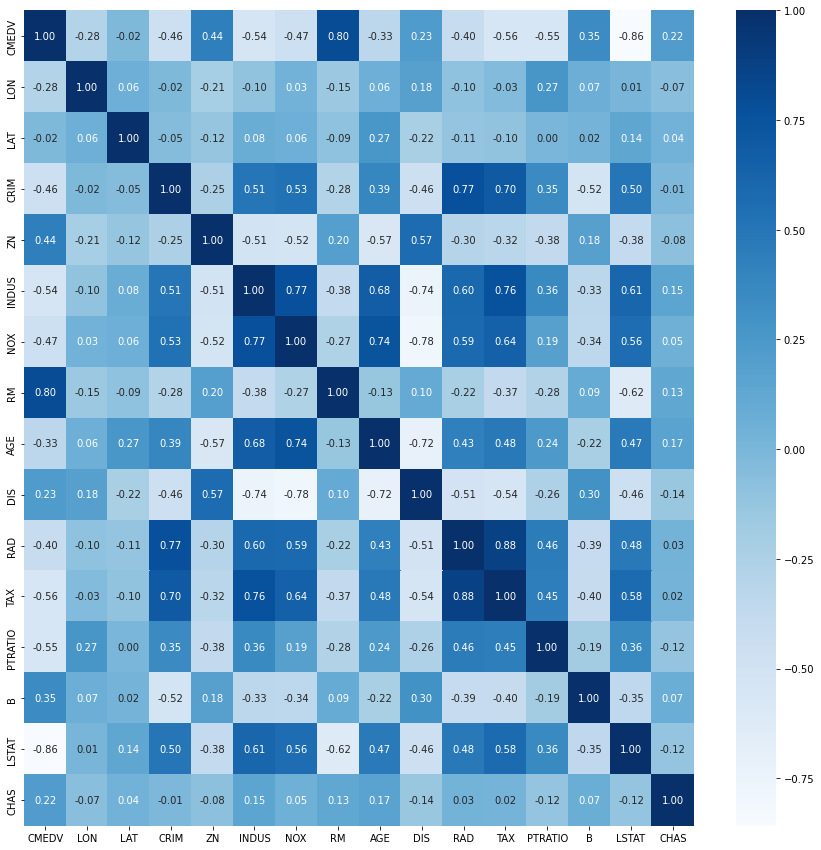

In [83]:
# seaborn heatmap 라이브러리를 이용하여 상관 관계 heatmap을 구현합니다.
plt.figure(figsize = (15, 15))
sns.heatmap(data = grad_predict.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

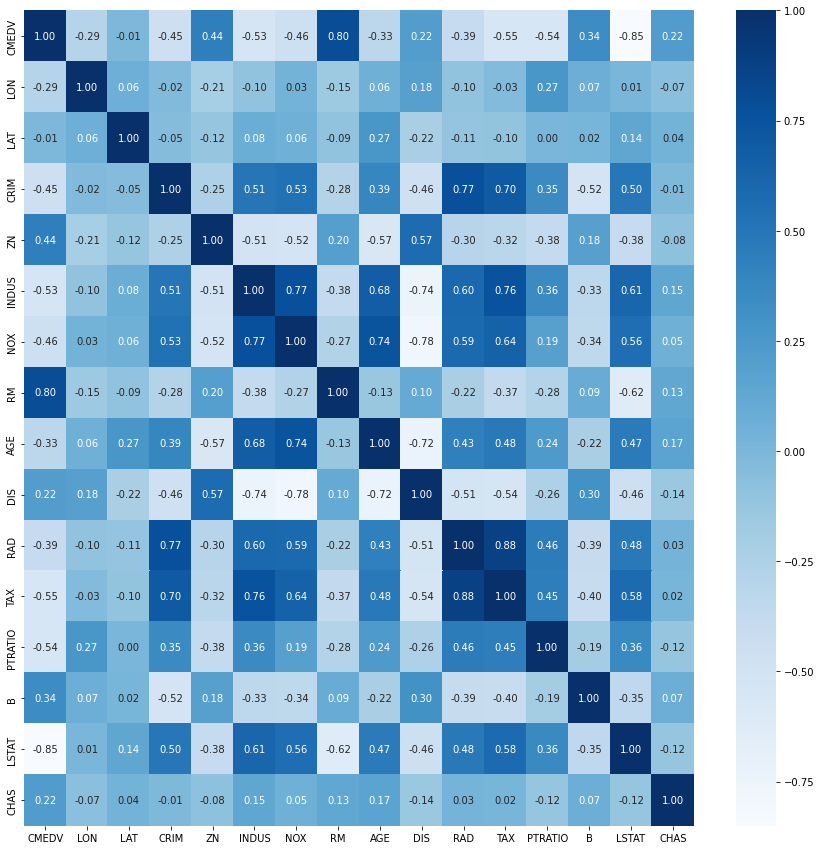

In [84]:
# seaborn heatmap 라이브러리를 이용하여 상관 관계 heatmap을 구현합니다.
plt.figure(figsize = (15, 15))
sns.heatmap(data = norm_predict.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()